In [74]:
# importing libraries
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from  PIL import  Image 
from  urllib.request import urlretrieve
import  warnings 
warnings.filterwarnings('ignore')

#loading the dataframe
stolen_vehicles = pd.read_csv('stolen_vehicles.csv')
make_details    = pd.read_csv('make_details.csv')
locations       = pd.read_csv('locations.csv')

In [75]:
#checking the columns
stolen_vehicles.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102


In [76]:
stolen_vehicles.tail()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
4548,4549,NaN,NaN,NaN,NaN,NaN,2/18/22,102
4549,4550,NaN,NaN,NaN,NaN,NaN,2/14/22,109
4550,4551,NaN,NaN,NaN,NaN,NaN,3/9/22,102
4551,4552,NaN,NaN,NaN,NaN,NaN,3/7/22,109
4552,4553,NaN,NaN,NaN,NaN,NaN,3/14/22,102


In [77]:
make_details.head()

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


In [78]:
make_details.tail()

,make_id,make_name,make_type
133,634,Volvo,Luxury
134,635,Voyager,Standard
135,636,Yamaha,Standard
136,637,Zephyr,Standard
137,638,Znen,Standard


In [79]:
locations.head()

,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21


In [80]:
locations.tail()

,location_id,region,country,population,density
11,112,Marlborough,New Zealand,"51,900",4.94
12,113,West Coast,New Zealand,"32,700",1.41
13,114,Canterbury,New Zealand,"655,000",14.72
14,115,Otago,New Zealand,"246,000",7.89
15,116,Southland,New Zealand,"102,400",3.28


In [81]:
stolen_vehicles.shape

(4553, 8)

In [82]:
make_details.shape

(138, 3)

In [83]:
locations.shape

(16, 5)

In [136]:
#checking for duplications 
stolen_vehicles.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4504    False
4505    False
4506    False
4507    False
4508    False
Length: 4509, dtype: bool

In [137]:
locations.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [138]:
make_details.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
133    False
134    False
135    False
136    False
137    False
Length: 138, dtype: bool

In [84]:
stolen_vehicles.describe()

,vehicle_id,make_id,model_year,location_id
count,4553.000000,4538.000000,4538.00000,4553.000000
mean,2277.000000,584.128471,2005.23182,105.779925
std,1314.482217,35.062695,9.11763,4.686655
min,1.000000,501.000000,1940.00000,101.000000
25%,1139.000000,550.000000,2000.00000,102.000000
50%,2277.000000,587.000000,2005.00000,104.000000
75%,3415.000000,619.000000,2011.00000,109.000000
max,4553.000000,638.000000,2022.00000,116.000000


In [85]:
stolen_vehicles.describe(include = 'object')

,vehicle_type,vehicle_desc,color,date_stolen
count,4527,4520,4538,4553
unique,25,1177,14,182
top,Stationwagon,HILUX,Silver,4/4/22
freq,945,137,1272,83


In [86]:
make_details.describe()

,make_id
count,138.000000
mean,569.500000
std,39.981246
min,501.000000
25%,535.250000
50%,569.500000
75%,603.750000
max,638.000000


In [87]:
make_details.describe(include = 'object')

,make_name,make_type
count,138,138
unique,138,2
top,Aakron Xpress,Standard
freq,1,123


In [88]:
locations.describe()

,location_id,density
count,16.000000,16.000000
mean,108.500000,43.300625
std,4.760952,86.218074
min,101.000000,1.410000
25%,104.750000,6.182500
50%,108.500000,13.820000
75%,112.250000,23.325000
max,116.000000,343.090000


In [89]:
locations.describe(include = 'object')

,region,country,population
count,16,16,16
unique,16,1,16
top,Northland,New Zealand,"201,500"
freq,1,16,1


In [90]:
#checking datatypes and missing values
stolen_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle_id    4553 non-null   int64  
 1   vehicle_type  4527 non-null   object 
 2   make_id       4538 non-null   float64
 3   model_year    4538 non-null   float64
 4   vehicle_desc  4520 non-null   object 
 5   color         4538 non-null   object 
 6   date_stolen   4553 non-null   object 
 7   location_id   4553 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 284.7+ KB


In [91]:
stolen_vehicles.columns

Index(['vehicle_id', 'vehicle_type', 'make_id', 'model_year', 'vehicle_desc',
       'color', 'date_stolen', 'location_id'],
      dtype='object')

In [92]:
#checking null values
stolen_vehicles.isnull().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
dtype: int64

In [93]:
#removing missing values
stolen_vehicles = stolen_vehicles.dropna()

In [94]:
stolen_vehicles

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102
...,...,...,...,...,...,...,...,...
4504,4505,Saloon,587.0,2001.0,MAXIMA,Red,3/22/22,104
4505,4506,Saloon,587.0,1995.0,CEFIRO,Green,2/15/22,104
4506,4507,Other Truck,587.0,1993.0,ATLAS,Blue,10/29/21,114
4507,4508,Light Van,580.0,2001.0,L300,White,12/9/21,101


In [95]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  16 non-null     int64  
 1   region       16 non-null     object 
 2   country      16 non-null     object 
 3   population   16 non-null     object 
 4   density      16 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 772.0+ bytes


In [96]:
#changing datatype for locations.population
# removing a special character
locations.population = locations.population.str.replace(',','')

In [97]:
#changing from object to integer
locations.population = locations.population.astype(int)
locations.density = locations.density.astype(int)

In [98]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  16 non-null     int64 
 1   region       16 non-null     object
 2   country      16 non-null     object
 3   population   16 non-null     int32 
 4   density      16 non-null     int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 644.0+ bytes


In [99]:
make_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   make_id    138 non-null    int64 
 1   make_name  138 non-null    object
 2   make_type  138 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


In [100]:
#Changing datatypes for stolen_vehicles.model_year, stolen_vehicles.make_id and  stolen_vehicles.date_stolen
stolen_vehicles.model_year = stolen_vehicles.model_year.astype(int)
stolen_vehicles.make_id    = stolen_vehicles.make_id.astype(int)
stolen_vehicles.date_stolen = pd.to_datetime(stolen_vehicles.date_stolen)

                                                        

In [101]:
#adding more columns to the stolen vehicles dataframe
stolen_vehicles['weekday'] = stolen_vehicles.date_stolen.dt.weekday
stolen_vehicles['month'] =  stolen_vehicles.date_stolen.dt.month
stolen_vehicles['year'] =  stolen_vehicles.date_stolen.dt.year

In [102]:
stolen_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4509 entries, 0 to 4508
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   vehicle_id    4509 non-null   int64         
 1   vehicle_type  4509 non-null   object        
 2   make_id       4509 non-null   int32         
 3   model_year    4509 non-null   int32         
 4   vehicle_desc  4509 non-null   object        
 5   color         4509 non-null   object        
 6   date_stolen   4509 non-null   datetime64[ns]
 7   location_id   4509 non-null   int64         
 8   weekday       4509 non-null   int32         
 9   month         4509 non-null   int32         
 10  year          4509 non-null   int32         
dtypes: datetime64[ns](1), int32(5), int64(2), object(3)
memory usage: 334.7+ KB


#### Analysis

#### Q: What day of the week are vehicles often most  or least stolen?

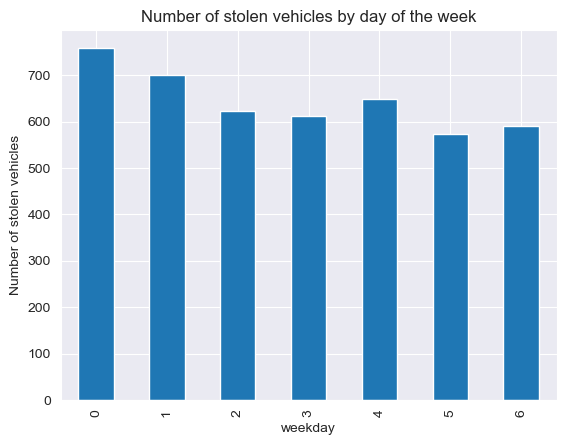

In [103]:
stolen_vehicles.groupby('weekday')['vehicle_id'].count().plot(kind = 'bar')
plt.title('Number of stolen vehicles by day of the week')
plt.ylabel('Number of stolen vehicles')
sns.set_style("darkgrid");

##### A: Most vehicles are stolen on Mondays and least stolen on Saturdays 

#### Q: What type of vehicles are most often and least often stolen? Does this vary by region?

In [104]:
#merging the stolen_vehicles and locations dataframes 
stolen_locations = stolen_vehicles.merge(locations, on = 'location_id')

In [105]:
stolen_locations

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,weekday,month,year,region,country,population,density
0,1,Trailer,623,2021,BST2021D,Silver,2021-11-05,102,4,11,2021,Auckland,New Zealand,1695200,343
1,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2022-02-13,102,6,2,2022,Auckland,New Zealand,1695200,343
2,5,Trailer,623,2018,D-MAX 8X5,Silver,2022-01-10,102,0,1,2022,Auckland,New Zealand,1695200,343
3,6,Roadbike,636,2005,YZF-R6T,Black,2021-12-31,102,4,12,2021,Auckland,New Zealand,1695200,343
4,12,Trailer,538,2018,BRENT SMITH TRAILERS,Silver,2022-02-28,102,0,2,2022,Auckland,New Zealand,1695200,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,4004,Trailer,595,2010,UNBRAKED TANDEM,Silver,2022-03-25,116,4,3,2022,Southland,New Zealand,102400,3
4505,4240,Saloon,619,1992,COROLLA,White,2022-01-31,116,0,1,2022,Southland,New Zealand,102400,3
4506,4283,Saloon,550,1997,CIVIC,Gold,2022-01-08,116,5,1,2022,Southland,New Zealand,102400,3
4507,4393,Saloon,580,1999,LANCER,White,2022-03-08,116,1,3,2022,Southland,New Zealand,102400,3


In [106]:
stolen_vehicle_type_region =stolen_locations.groupby('region')['vehicle_type'].value_counts()

In [107]:
stolen_vehicle_type_region.head(50)

region         vehicle_type        
Auckland       Saloon                  326
               Stationwagon            306
               Hatchback               296
               Roadbike                163
               Trailer                 137
               Moped                    88
               Utility                  83
               Light Van                71
               Boat Trailer             37
               Trailer - Heavy          37
               Other Truck              18
               Sports Car               15
               Caravan                  13
               Convertible               9
               Flat Deck Truck           8
               Light Bus                 3
               Cab and Chassis Only      3
               Mobile Home - Light       3
               Heavy Van                 2
               Mobile Machine            2
Bay of Plenty  Utility                 100
               Saloon                   86
               Sta

In [108]:
stolen_vehicle_type_region.tail(60)

region      vehicle_type        
Otago       Other Truck              2
            Light Van                2
            Mobile Home - Light      1
            Sports Car               1
            Cab and Chassis Only     1
            Trail Bike               1
Southland   Stationwagon             9
            Saloon                   7
            Utility                  2
            Roadbike                 2
            Trailer                  2
            Hatchback                2
            Caravan                  1
            Moped                    1
Taranaki    Stationwagon            23
            Trailer                 21
            Saloon                  21
            Utility                 14
            Hatchback               13
            Moped                    4
            Boat Trailer             3
            Roadbike                 3
            Trailer - Heavy          2
            All Terrain Vehicle      2
            Mobile Home - Light

##### A: The station wagon and the saloon are the most stolen in all the regions and the articulated truck is the least stolen in most regions 

In [109]:
#setting an index for the dataframe
stolen_locations.set_index('date_stolen')

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,location_id,weekday,month,year,region,country,population,density
date_stolen,,,,,,,,,,,,,,
2021-11-05,1,Trailer,623,2021,BST2021D,Silver,102,4,11,2021,Auckland,New Zealand,1695200,343
2022-02-13,3,Boat Trailer,623,2021,ASD JETSKI,Silver,102,6,2,2022,Auckland,New Zealand,1695200,343
2022-01-10,5,Trailer,623,2018,D-MAX 8X5,Silver,102,0,1,2022,Auckland,New Zealand,1695200,343
2021-12-31,6,Roadbike,636,2005,YZF-R6T,Black,102,4,12,2021,Auckland,New Zealand,1695200,343
2022-02-28,12,Trailer,538,2018,BRENT SMITH TRAILERS,Silver,102,0,2,2022,Auckland,New Zealand,1695200,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,4004,Trailer,595,2010,UNBRAKED TANDEM,Silver,116,4,3,2022,Southland,New Zealand,102400,3
2022-01-31,4240,Saloon,619,1992,COROLLA,White,116,0,1,2022,Southland,New Zealand,102400,3
2022-01-08,4283,Saloon,550,1997,CIVIC,Gold,116,5,1,2022,Southland,New Zealand,102400,3


#### Q: What is the average age of the vehicles that are stolen? Does this vary based on the vehicle type?

In [110]:
stolen_locations['vehicles_age'] = stolen_locations.year - stolen_locations.model_year

In [111]:
stolen_locations

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,weekday,month,year,region,country,population,density,vehicles_age
0,1,Trailer,623,2021,BST2021D,Silver,2021-11-05,102,4,11,2021,Auckland,New Zealand,1695200,343,0
1,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2022-02-13,102,6,2,2022,Auckland,New Zealand,1695200,343,1
2,5,Trailer,623,2018,D-MAX 8X5,Silver,2022-01-10,102,0,1,2022,Auckland,New Zealand,1695200,343,4
3,6,Roadbike,636,2005,YZF-R6T,Black,2021-12-31,102,4,12,2021,Auckland,New Zealand,1695200,343,16
4,12,Trailer,538,2018,BRENT SMITH TRAILERS,Silver,2022-02-28,102,0,2,2022,Auckland,New Zealand,1695200,343,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,4004,Trailer,595,2010,UNBRAKED TANDEM,Silver,2022-03-25,116,4,3,2022,Southland,New Zealand,102400,3,12
4505,4240,Saloon,619,1992,COROLLA,White,2022-01-31,116,0,1,2022,Southland,New Zealand,102400,3,30
4506,4283,Saloon,550,1997,CIVIC,Gold,2022-01-08,116,5,1,2022,Southland,New Zealand,102400,3,25
4507,4393,Saloon,580,1999,LANCER,White,2022-03-08,116,1,3,2022,Southland,New Zealand,102400,3,23


In [120]:
avg_stolen_vehicle_type = stolen_locations.groupby('vehicle_type')['vehicles_age'].mean().sort_values(ascending = False)

Text(0, 0.5, 'Stolen Vehicles Count')

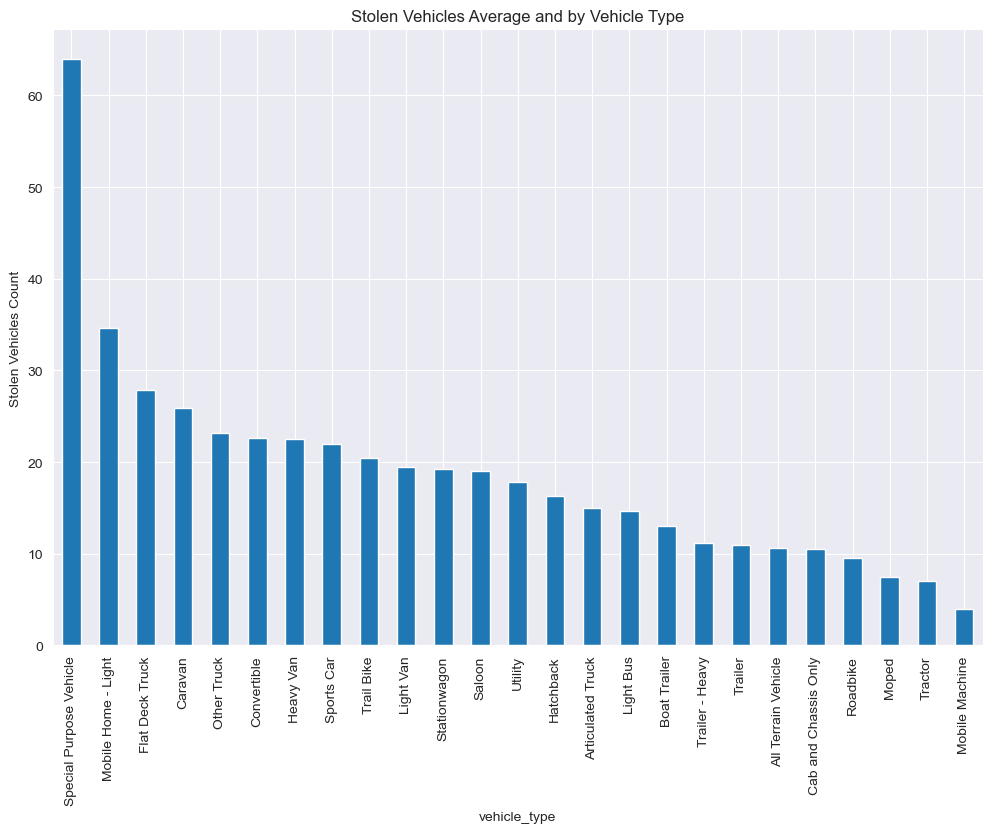

In [128]:
plt.figure(figsize= (12, 8))
avg_stolen_vehicle_type.plot(kind = 'bar');

plt.title('Stolen Vehicles Average and by Vehicle Type')
plt.ylabel('Stolen Vehicles Count')


In [112]:
Avg_age_stolen_vehicles  = round (stolen_locations.vehicles_age.mean(),0)

In [113]:

print('The overal average age of the stolen vehicles is {} years'.format(Avg_age_stolen_vehicles))

The overal average age of the stolen vehicles is 16.0 years


##### A: The overal average age of the stolen vehicles is 16 years but, based on vehicle type the Special Purpose Vehicle has the highest average age of 64 years and the mobile machine has 4 years 

#### Q: Which region has the most and least number of stolen vehicles? What are the characteristics of the region?

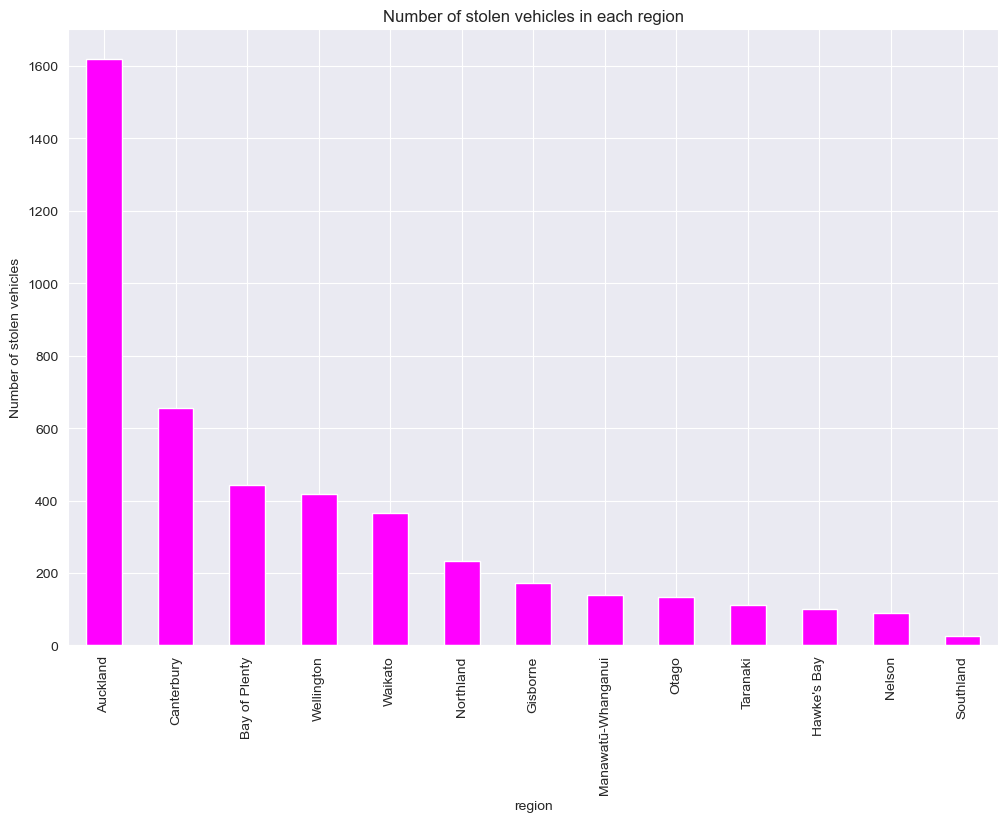

In [135]:
plt.figure(figsize = (12, 8))
color = ['magenta']
stolen_locations.region.value_counts().plot(kind = 'bar', color = color);
plt.title('Number of stolen vehicles in each region')
plt.ylabel('Number of stolen vehicles')

plt.show()

In [42]:
Auckland_char = stolen_locations.query("region == 'Auckland'").loc[:,['population','density']][:1]
Southland_char = stolen_locations.query("region == 'Southland'").loc[:,['population','density']][:1]

In [43]:
Auckland_char


,population,density
0,1695200,343


In [44]:
Southland_char

,population,density
4483,102400,3


##### A: The Auckland region has the highest number of stolen vehicles of 1620 vehicles, it has a high population of 1695200 people and a high density of 343 people, Southland region has the least number of stolen vehicles of 26 vehicles only, the population is 102400 and the density is 3 people only 